In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import re
from sklearn import tree

In [4]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
from subprocess import check_call

In [7]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
train = pd.read_csv(r"C:\Users\Save_Peter\train_dataset.csv")

In [10]:
train

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
0,717574683,0,53,F,3,Unknown,Married,$40K - $60K,Blue,46,...,942,706,576,541,14,18,17,14,9,13
1,711852783,0,46,M,2,Unknown,Married,$60K - $80K,Blue,36,...,791,597,637,433,7,2,19,10,7,11
2,720729108,0,32,F,0,Unknown,Single,Less than $40K,Blue,17,...,789,772,921,760,18,13,18,15,11,12
3,720074583,0,42,M,1,Graduate,Unknown,$80K - $120K,Blue,36,...,1609,1126,1017,919,16,13,16,9,8,14
4,823904133,1,53,F,2,College,Single,Unknown,Blue,49,...,609,228,317,416,6,14,19,6,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,789560433,1,49,M,3,Post-Graduate,Single,$60K - $80K,Blue,42,...,764,838,917,873,10,13,11,10,6,3
8097,817035108,0,31,M,2,Graduate,Single,Less than $40K,Blue,14,...,3065,2220,1656,2296,18,26,16,19,15,21
8098,789698733,0,40,F,4,Uneducated,Married,Less than $40K,Blue,27,...,828,671,700,612,15,15,10,14,10,14
8099,785529708,0,59,M,1,Graduate,Single,$120K +,Blue,53,...,820,494,789,518,16,13,14,10,7,10


In [11]:
test = pd.read_csv(r"C:\Users\Save_Peter\test_dataset.csv")
test

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
0,790204983,0,46,F,2,Graduate,Married,Unknown,Blue,40,...,711,746,537,736,18,21,18,16,9,11
1,719099583,1,42,M,3,Graduate,Married,$40K - $60K,Blue,34,...,349,36,259,109,7,7,13,0,3,3
2,713220258,0,65,F,0,High School,Married,Unknown,Blue,36,...,137,180,178,234,11,2,3,5,2,6
3,709064208,1,43,F,2,Uneducated,Single,Less than $40K,Blue,32,...,499,275,384,247,8,13,11,2,6,9
4,824763783,0,59,F,0,College,Single,Less than $40K,Blue,55,...,963,419,576,636,17,10,16,12,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,712342833,0,52,F,2,Graduate,Married,Unknown,Blue,36,...,839,524,606,573,15,12,16,14,14,9
2022,711709683,0,53,F,2,Uneducated,Married,Less than $40K,Blue,36,...,433,307,352,208,13,7,9,8,4,7
2023,809809008,0,47,F,5,Graduate,Married,Less than $40K,Blue,42,...,895,562,665,583,14,18,13,9,7,7
2024,716671983,0,38,M,0,High School,Single,$80K - $120K,Blue,29,...,787,482,500,572,13,11,14,9,7,11


In [12]:

Y_test = test['Attrition_Flag']
test = test.drop(['Attrition_Flag'], axis = 1)

In [13]:
full_data = [train,test]

In [14]:
original_train = train.copy()

In [15]:
train['Trans_Count_Mar13'].quantile(0.75)

12.0

In [16]:
#Since we dont have any null values..
#let's proceed


In [17]:
for dataset in full_data:
    dataset.loc[dataset['Customer_Age'].values <= 41 , 'Customer_Age'] = 0
    dataset.loc[(dataset['Customer_Age'].values > 41) & (dataset['Customer_Age'].values <= 46) , 'Customer_Age'] = 1
    dataset.loc[(dataset['Customer_Age'].values > 46) & (dataset['Customer_Age'].values <= 52 ) , 'Customer_Age'] = 2
    dataset.loc[(dataset['Customer_Age'].values > 52) , 'Customer_Age'] = 3
    dataset['Gender'] = dataset['Gender'].map({'F': 0, 'M':1}).astype(int)
    dataset['Education_Level'] = dataset['Education_Level'].map({'College':0, 'Doctorate':1, 'Graduate':2,'High School':3, 'Post-Graduate':4, 'Uneducated':5, 'Unknown':6}).astype(int)
    dataset['Marital_Status'] = dataset['Marital_Status'].map({'Divorced':0, 'Married': 1, 'Single':2, 'Unknown':3}).astype(int)
    dataset['Income_Category'] = dataset['Income_Category'].map({'Unknown':0 , 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,'$120K +':5}).astype(int)
    dataset['Card_Category'] = dataset['Card_Category'].map({'Blue':0, 'Gold':1, 'Platinum': 2, 'Silver':3}).astype(int)
    dataset.loc[dataset['Months_on_book'].values <= 31 , 'Months_on_book'] = 0
    dataset.loc[(dataset['Months_on_book'].values > 31) & (dataset['Months_on_book'] <= 36), 'Months_on_book'] = 1
    dataset.loc[(dataset['Months_on_book'].values > 36) & (dataset['Months_on_book'] <= 40), 'Months_on_book'] = 2
    dataset.loc[dataset['Months_on_book'].values > 40 , 'Months_on_book'] = 3
    dataset.loc[(dataset['Credit_Limit'].values) < 2570, 'Credit_Limit'] = 0
    dataset.loc[(dataset['Credit_Limit'].values > 2570) & (dataset['Credit_Limit'].values <= 4583), 'Credit_Limit'] = 1
    dataset.loc[(dataset['Credit_Limit'].values > 4583) & (dataset['Credit_Limit'].values <= 11106), 'Credit_Limit'] = 2
    dataset.loc[(dataset['Credit_Limit'].values) > 11106, 'Credit_Limit'] = 3
    dataset.loc[dataset['Total_Revolving_Bal'] <= 425, 'Total_Revolving_Bal'] = 0
    dataset.loc[(dataset['Total_Revolving_Bal'] > 425) & (dataset['Total_Revolving_Bal'] <= 1281 ), 'Total_Revolving_Bal'] = 1
    dataset.loc[(dataset['Total_Revolving_Bal'] > 1281) & (dataset['Total_Revolving_Bal'] <= 1784 ), 'Total_Revolving_Bal'] = 2
    dataset.loc[dataset['Total_Revolving_Bal'] > 1784, 'Total_Revolving_Bal'] = 3
    dataset.loc[dataset['Trans_Amt_Oct12'] <= 427, 'Trans_Amt_Oct12'] = 0
    dataset.loc[(dataset['Trans_Amt_Oct12'] > 427) & (dataset['Trans_Amt_Oct12'] <= 706), 'Trans_Amt_Oct12'] = 1
    dataset.loc[(dataset['Trans_Amt_Oct12'] > 706) & (dataset['Trans_Amt_Oct12'] <= 915), 'Trans_Amt_Oct12'] = 2
    dataset.loc[dataset['Trans_Amt_Oct12'] > 915, 'Trans_Amt_Oct12'] = 3
    dataset.loc[(dataset['Trans_Amt_Nov12']) <= 374, 'Trans_Amt_Nov12'] = 0
    dataset.loc[(dataset['Trans_Amt_Nov12'] > 374) & (dataset['Trans_Amt_Nov12'] <= 659), 'Trans_Amt_Nov12'] = 1
    dataset.loc[(dataset['Trans_Amt_Nov12'] > 659) & (dataset['Trans_Amt_Nov12'] <= 994), 'Trans_Amt_Nov12'] = 2
    dataset.loc[dataset['Trans_Amt_Nov12'] > 994, 'Trans_Amt_Nov12'] = 3
    dataset.loc[(dataset['Trans_Amt_Dec12']) <= 416, 'Trans_Amt_Dec12'] = 0
    dataset.loc[(dataset['Trans_Amt_Dec12'] > 416) & (dataset['Trans_Amt_Dec12'] <= 726), 'Trans_Amt_Dec12'] = 1
    dataset.loc[(dataset['Trans_Amt_Dec12'] > 726) & (dataset['Trans_Amt_Dec12'] <= 972), 'Trans_Amt_Dec12'] = 2
    dataset.loc[dataset['Trans_Amt_Dec12'] > 972, 'Trans_Amt_Dec12'] = 3
    dataset.loc[(dataset['Trans_Amt_Jan13']) <= 304 , 'Trans_Amt_Jan13'] = 0
    dataset.loc[(dataset['Trans_Amt_Jan13'] > 304) & (dataset['Trans_Amt_Jan13'] <= 509), 'Trans_Amt_Jan13'] = 1
    dataset.loc[(dataset['Trans_Amt_Jan13'] > 509) & (dataset['Trans_Amt_Jan13'] <= 763), 'Trans_Amt_Jan13'] = 2
    dataset.loc[(dataset['Trans_Amt_Jan13']) > 763 , 'Trans_Amt_Jan13'] = 3
    dataset.loc[(dataset['Trans_Amt_Feb13']) <= 273  , 'Trans_Amt_Feb13'] = 0
    dataset.loc[(dataset['Trans_Amt_Feb13'] > 273) & (dataset['Trans_Amt_Feb13'] <= 497), 'Trans_Amt_Feb13'] = 1
    dataset.loc[(dataset['Trans_Amt_Feb13'] > 497) & (dataset['Trans_Amt_Feb13'] <= 729), 'Trans_Amt_Feb13'] = 2
    dataset.loc[(dataset['Trans_Amt_Feb13']) > 729  , 'Trans_Amt_Feb13'] = 3
    dataset.loc[(dataset['Trans_Amt_Mar13']) <= 266  , 'Trans_Amt_Mar13'] = 0
    dataset.loc[(dataset['Trans_Amt_Mar13'] > 266) & (dataset['Trans_Amt_Mar13'] <= 509), 'Trans_Amt_Mar13'] = 1
    dataset.loc[(dataset['Trans_Amt_Mar13'] > 509) & (dataset['Trans_Amt_Mar13'] <= 705), 'Trans_Amt_Mar13'] = 2
    dataset.loc[(dataset['Trans_Amt_Mar13']) > 705  , 'Trans_Amt_Mar13'] = 3
    dataset.loc[(dataset['Trans_Count_Oct12']) <= 9  , 'Trans_Count_Oct12'] = 0
    dataset.loc[(dataset['Trans_Count_Oct12'] > 9) & (dataset['Trans_Count_Oct12'] <= 13)  , 'Trans_Count_Oct12'] = 1
    dataset.loc[(dataset['Trans_Count_Oct12'] > 13) & (dataset['Trans_Count_Oct12'] <= 16)  , 'Trans_Count_Oct12'] = 2
    dataset.loc[(dataset['Trans_Count_Oct12']) > 16 , 'Trans_Count_Oct12'] = 3
    dataset.loc[(dataset['Trans_Count_Nov12']) <= 9  , 'Trans_Count_Nov12'] = 0 
    dataset.loc[(dataset['Trans_Count_Nov12'] > 9) & (dataset['Trans_Count_Nov12'] <= 12)  , 'Trans_Count_Nov12'] = 1
    dataset.loc[(dataset['Trans_Count_Nov12'] > 12) & (dataset['Trans_Count_Nov12'] <= 16)  , 'Trans_Count_Nov12'] = 2
    dataset.loc[(dataset['Trans_Count_Nov12']) > 16  , 'Trans_Count_Nov12'] = 3
    dataset.loc[(dataset['Trans_Count_Dec12']) <= 9  , 'Trans_Count_Dec12'] = 0
    dataset.loc[(dataset['Trans_Count_Dec12'] > 9) & (dataset['Trans_Count_Dec12'] <= 13)  , 'Trans_Count_Dec12'] = 1
    dataset.loc[(dataset['Trans_Count_Dec12'] > 13) & (dataset['Trans_Count_Dec12'] <= 17)  , 'Trans_Count_Dec12'] = 2
    dataset.loc[(dataset['Trans_Count_Dec12']) > 17 , 'Trans_Count_Dec12'] = 3
    dataset.loc[(dataset['Trans_Count_Jan13']) <= 8  , 'Trans_Count_Jan13'] = 0
    dataset.loc[(dataset['Trans_Count_Jan13'] > 8) & (dataset['Trans_Count_Jan13'] <= 10)  , 'Trans_Count_Jan13'] = 1
    dataset.loc[(dataset['Trans_Count_Jan13'] > 10) & (dataset['Trans_Count_Jan13'] <= 13)  , 'Trans_Count_Jan13'] = 2
    dataset.loc[(dataset['Trans_Count_Jan13']) >13  , 'Trans_Count_Jan13'] = 3
    dataset.loc[(dataset['Trans_Count_Feb13']) <= 4  , 'Trans_Count_Feb13'] = 0
    dataset.loc[(dataset['Trans_Count_Feb13'] > 4) & (dataset['Trans_Count_Feb13'] <= 7)  , 'Trans_Count_Feb13'] = 1
    dataset.loc[(dataset['Trans_Count_Feb13'] > 7) & (dataset['Trans_Count_Feb13'] <= 10)  , 'Trans_Count_Feb13'] = 2
    dataset.loc[(dataset['Trans_Count_Feb13']) > 10  , 'Trans_Count_Feb13'] = 3
    dataset.loc[(dataset['Trans_Count_Mar13']) <= 6  , 'Trans_Count_Mar13'] = 0
    dataset.loc[(dataset['Trans_Count_Mar13'] > 6) & (dataset['Trans_Count_Mar13'] <= 10)  , 'Trans_Count_Mar13'] = 1
    dataset.loc[(dataset['Trans_Count_Mar13'] > 10) & (dataset['Trans_Count_Mar13'] <= 12)  , 'Trans_Count_Mar13'] = 2
    dataset.loc[(dataset['Trans_Count_Mar13']) > 12 , 'Trans_Count_Mar13'] = 3
    
    
    
    

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   CLIENTNUM                 8101 non-null   int64
 1   Attrition_Flag            8101 non-null   int64
 2   Customer_Age              8101 non-null   int64
 3   Gender                    8101 non-null   int32
 4   Dependent_count           8101 non-null   int64
 5   Education_Level           8101 non-null   int32
 6   Marital_Status            8101 non-null   int32
 7   Income_Category           8101 non-null   int32
 8   Card_Category             8101 non-null   int32
 9   Months_on_book            8101 non-null   int64
 10  Total_Relationship_Count  8101 non-null   int64
 11  Months_Inactive_12_mon    8101 non-null   int64
 12  Contacts_Count_12_mon     8101 non-null   int64
 13  Credit_Limit              8101 non-null   int64
 14  Total_Revolving_Bal       8101 non-null 

In [25]:
train
#So we have achieved the binary data in which we want

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
0,717574683,0,3,0,3,6,1,2,0,3,...,2,2,2,2,2,3,2,3,2,3
1,711852783,0,1,1,2,6,1,3,0,1,...,2,2,2,1,0,0,3,1,1,2
2,720729108,0,0,0,0,6,2,1,0,0,...,2,3,3,3,3,2,3,3,3,2
3,720074583,0,1,1,1,2,3,4,0,1,...,3,3,3,3,2,2,2,1,2,3
4,823904133,1,3,0,2,0,2,0,0,3,...,1,0,1,1,0,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,789560433,1,2,1,3,4,2,3,0,3,...,2,3,3,3,1,2,1,1,1,0
8097,817035108,0,0,1,2,2,2,1,0,0,...,3,3,3,3,3,3,2,3,3,3
8098,789698733,0,0,0,4,5,1,1,0,0,...,2,2,2,2,2,2,1,3,2,3
8099,785529708,0,3,1,1,2,2,5,0,3,...,2,1,3,2,2,2,2,1,1,1


<AxesSubplot:xlabel='Gender', ylabel='count'>

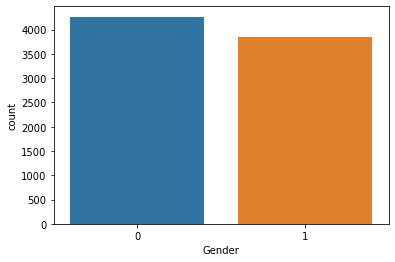

In [28]:
sbn.countplot(x = 'Gender', data = train)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

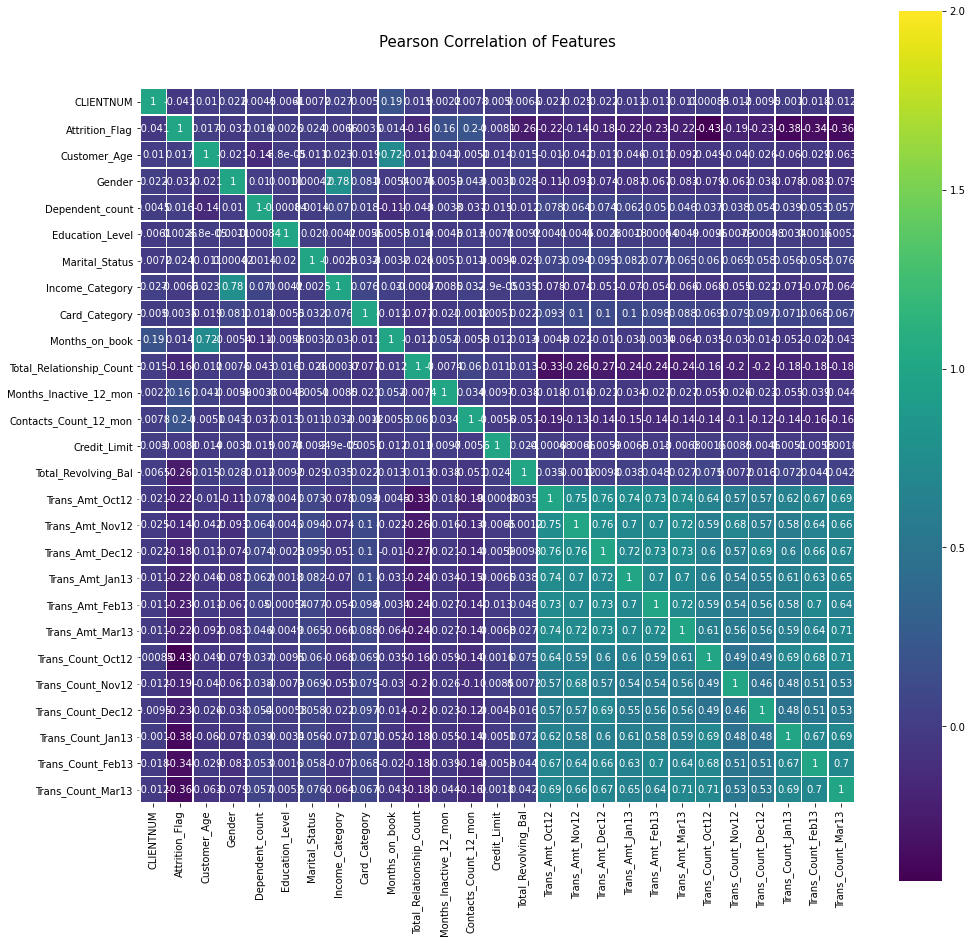

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sbn.heatmap(train.astype(float).corr(),linewidths=0.5,vmax=2.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [21]:
#So here we can see that income_category and Gender have a very close correlation, which means there is a close relationship asper
#they might similar in the scope of this business

In [22]:
#let's explore a relationship among them

In [23]:
train[['Income_Category', 'Attrition_Flag']].groupby(['Income_Category'], as_index = False).agg(['mean', 'sum', 'count'])
#map({'Unknown':0 , 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,'$120K +':5}

Attrition_Flag           
                          mean  sum count
Income_Category                          
0                     0.158933  137   862
1                     0.166843  474  2841
2                     0.153476  223  1453
3                     0.135714  152  1120
4                     0.155324  194  1249
5                     0.175347  101   576

In [24]:
train[['Gender', 'Attrition_Flag']].groupby(['Gender'], as_index = False).agg(['mean', 'sum', 'count'])

Attrition_Flag           
                 mean  sum count
Gender                          
0            0.169325  722  4264
1            0.145687  559  3837

In [25]:
#Right now, i can't see any relationship among those two variables , buh they have the highest correlation, so let's group each other
#together and test by grouping each other, and we'll decide which has the more valuables features than the other

In [26]:
train[['Gender', 'Income_Category']].groupby(['Income_Category'], as_index = False).agg(['mean', 'sum', 'count'])
#map({'Unknown':0 , 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,'$120K +':5}

Gender            
                     mean   sum count
Income_Category                      
0                0.051044    44   862
1                0.079197   225  2841
2                0.428768   623  1453
3                1.000000  1120  1120
4                1.000000  1249  1249
5                1.000000   576   576

In [27]:
#So we can see that our income category captures more features of gender , thus income category will have more preference than
#gender, thus income category will serve as our first node
train.loc[train['Attrition_Flag']==1, 'Attrition_Flag'].count()

1281

In [28]:
#Gini impurity

In [29]:
#So now let's calculate the gini impurity for income category, prior to the split.. which has mode decrease in splits in the
#two features

In [30]:
#Gini impurity of the starting node, sum  of observations that got attrited , total count of observations
def Gini_Impurity(attrited_sum, attrited_count):
    attrited_probability = attrited_sum / attrited_count
    not_attrited_probability = 1 - attrited_probability
    random_attrited_probability = attrited_probability
    not_random_attrited_probability = 1 - random_attrited_probability
    Gini_Impurity = (attrited_probability * not_random_attrited_probability) + (random_attrited_probability * not_attrited_probability )
    return Gini_Impurity
get_gini_impurity = Gini_Impurity(1281, 8101)
get_gini_impurity

0.26624792740935893

In [31]:
Gini_Impurity_Unknown = Gini_Impurity(137,862)
Gini_Impurity_Unknown

0.2673462136831735

In [32]:
Gini_Impurity_Others = Gini_Impurity(1144,7239)
Gini_Impurity_Others

0.2661169742160968

In [33]:
get_gini_split = (862/8101 * Gini_Impurity_Unknown) + (7239/8101 * Gini_Impurity_Others)


In [34]:
get_gini_decrease = get_gini_split - get_gini_impurity
get_gini_decrease

-1.5398074265648987e-07

In [35]:
gini_impurity_male = Gini_Impurity(559, 3837)
gini_impurity_male

0.24892421967932366

In [36]:
gini_impurity_female = Gini_Impurity(722,4264)
gini_impurity_female

0.2813075303866042

In [37]:
get_gini_split_gender = (3837/8101 * gini_impurity_male) + (4264/8101 * gini_impurity_female)
get_gini_decrease = get_gini_split_gender - get_gini_impurity

In [38]:
get_gini_decrease

-0.0002785976379671151

In [39]:
#So. split by gender decreased the impurity starting node the most, obviously.. we'll split by gender and not income category
train

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
0,717574683,0,3,0,3,6,1,2,0,3,...,2,2,2,2,2,3,2,3,2,3
1,711852783,0,1,1,2,6,1,3,0,1,...,2,2,2,1,0,0,3,1,1,2
2,720729108,0,0,0,0,6,2,1,0,0,...,2,3,3,3,3,2,3,3,3,2
3,720074583,0,1,1,1,2,3,4,0,1,...,3,3,3,3,2,2,2,1,2,3
4,823904133,1,3,0,2,0,2,0,0,3,...,1,0,1,1,0,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,789560433,1,2,1,3,4,2,3,0,3,...,2,3,3,3,1,2,1,1,1,0
8097,817035108,0,0,1,2,2,2,1,0,0,...,3,3,3,3,3,3,2,3,3,3
8098,789698733,0,0,0,4,5,1,1,0,0,...,2,2,2,2,2,2,1,3,2,3
8099,785529708,0,3,1,1,2,2,5,0,3,...,2,1,3,2,2,2,2,1,1,1


In [40]:

list(test)[:10]

['CLIENTNUM',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count']

In [41]:
cv = KFold(n_splits = 10)
max_attribute = len(list(test)[:10])
accuracies = list()
depth_range = range(1, max_attribute + 1)
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    for train_fold, valid_fold in cv.split(train):
        F_train = train.loc[train_fold]
        F_valid = train.loc[valid_fold]
        model = tree_model.fit(X = F_train.drop(['Attrition_Flag'], axis = 1), y = F_train['Attrition_Flag'])
        valid_acc = model.score(X = F_valid.drop(['Attrition_Flag'], axis = 1), y = F_valid['Attrition_Flag'])
        fold_accuracy.append(valid_acc)
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    accuracies = accuracies[:10]
    
df = pd.DataFrame({'max_depth': depth_range, 'avg_accuracies': accuracies})
df = df[['max_depth','avg_accuracies']]
print(df.to_string(index = False))

    



 max_depth  avg_accuracies
         1        0.841869
         2        0.893593
         3        0.902852
         4        0.916679
         5        0.925318
         6        0.925812
         7        0.930873
         8        0.935440
         9        0.934329
        10        0.934699


In [42]:
#So now we now we see our best result is at max_depth = 8

In [43]:
accurate_tree = tree.DecisionTreeClassifier(max_depth = 8)

In [44]:

test

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Trans_Amt_Dec12,Trans_Amt_Jan13,Trans_Amt_Feb13,Trans_Amt_Mar13,Trans_Count_Oct12,Trans_Count_Nov12,Trans_Count_Dec12,Trans_Count_Jan13,Trans_Count_Feb13,Trans_Count_Mar13
0,790204983,1,0,2,2,1,0,0,2,4,...,1,2,2,3,3,3,3,3,2,2
1,719099583,1,1,3,2,1,2,0,1,3,...,0,0,0,0,0,0,1,0,0,0
2,713220258,3,0,0,3,1,0,0,1,4,...,0,0,0,0,1,0,0,0,0,0
3,709064208,1,0,2,5,2,1,0,1,4,...,1,0,1,0,0,2,1,0,1,1
4,824763783,3,0,0,0,2,1,0,3,2,...,2,1,2,2,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,712342833,2,0,2,2,1,0,0,1,5,...,2,2,2,2,2,1,2,3,3,1
2022,711709683,3,0,2,5,1,1,0,1,6,...,1,1,1,0,1,0,0,0,0,1
2023,809809008,2,0,5,2,1,1,0,3,5,...,2,2,2,2,2,3,1,1,1,1
2024,716671983,0,1,0,3,2,4,0,0,3,...,2,1,2,2,1,1,2,1,1,2


In [45]:
X_train = train.drop(['Attrition_Flag'], axis = 1).values

In [46]:
Y_train = train['Attrition_Flag'].values

In [47]:
accurate_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=8)

In [48]:
predictions = accurate_tree.predict(test.values)

In [49]:
CLIENTNUM = test['CLIENTNUM']

In [50]:
attrition_predictions = pd.DataFrame({'CLIENTNUM':CLIENTNUM, 'Attrition_Flag': predictions})

In [51]:
attrition_predictions.to_csv('attrition_predictions.csv', index = False)

In [52]:
acc_decision_score = accurate_tree.score(X_train,Y_train)

In [53]:
round(acc_decision_score * 100,2)

95.93

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(Y_test, predictions)

0.8712118084227911